# hourly_visualisation

This notebook visualises the hourly data of an IES weather .txt file.

Use ***Shift-Enter*** or ***Ctrl-Enter*** to run the code cells.

The notebook creates plots in the notebook itself and it also saves these plots in the folder 'hourly_visualisation_outputs'.

The notebook creates plots for one weather variable at a time. This variable can be changed in Step 4.

## Step 1: Choose the file to visualise

The weather data in IES VistaPro can be exported using the Save icon when viewing a table. To do this:

- Run an IES simulation
- Go to the VistaPro results module
- Select the weather data variables of interest
- View these variable in a table
- Click on the ***save*** icon to export this data as a .txt file.

The name/path for the IES weather .txt file can then be specified in the code cell below.

In [1]:
filename='MyWeather.txt'

## Step 2: Run the code below to import the file

In [2]:
import pandas as pd
df=pd.read_csv(filename,sep='\t',encoding = 'unicode_escape')
df=df.drop([0,1])
df['Unnamed: 0']=df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 0']=df['Unnamed: 0'].str[5:] + r'/2003'
mask=(df['Unnamed: 1']=='24:00')
df['Unnamed: 1'][mask]='00:00'
df['Unnamed: 1']=df['Unnamed: 1'].str[:3]+'30'
df.insert(0,column='datetime',value=pd.to_datetime(df['Unnamed: 0']+' '+df['Unnamed: 1'],format='%d/%b/%Y %H:%M'))
df=df.drop(columns=['Unnamed: 0','Unnamed: 1'])
df=df.set_index('datetime')
df=df.astype('float64')
units={}
for column in df.columns: 
    var_name=column.split(' (')[0]
    unit=column.split(' (')[1].split(')')[0]
    df=df.rename(columns={column:var_name})
    units[var_name]=unit
print('UNITS: '+str(units))
df.head()

UNITS: {'External dew-point temp.': '°C', 'Global radiation': 'W/m²', 'Max. adaptive temp.': '°C', 'Daily running mean temp.': '°C', 'Direct radiation': 'W/m²', 'Wet-bulb temperature': '°C', 'Wind speed': 'm/s', 'Solar azimuth': 'deg.', 'Diffuse radiation': 'W/m²', 'Dry-bulb temperature': '°C'}


,External dew-point temp.,Global radiation,Max. adaptive temp.,Daily running mean temp.,Direct radiation,Wet-bulb temperature,Wind speed,Solar azimuth,Diffuse radiation,Dry-bulb temperature
datetime,,,,,,,,,,
2003-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-01 01:30:00,2.08,0.0,23.02,3.69,0.0,3.6,5.0,25.7,0.0,4.8
2003-01-01 02:30:00,2.22,0.0,23.02,3.69,0.0,3.6,6.0,48.8,0.0,4.7
2003-01-01 03:30:00,1.77,0.0,23.02,3.69,0.0,3.2,5.0,66.5,0.0,4.3
2003-01-01 04:30:00,1.69,0.0,23.02,3.69,0.0,3.0,5.0,80.6,0.0,4.0


## Step 3: View the weather variables available

In [3]:
for x in list(df.columns): print(x)

External dew-point temp.
Global radiation
Max. adaptive temp.
Daily running mean temp.
Direct radiation
Wet-bulb temperature
Wind speed
Solar azimuth
Diffuse radiation
Dry-bulb temperature


## Step 4: Choose the weather variable to analysis

The weather variables are listed in Step 3. One variable is chosen for analysis in the code cell below.

In [4]:
var='Dry-bulb temperature'

## Step 5: Create and save an hourly time-series plot

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_timeseries_Dry-bulb temperature.png


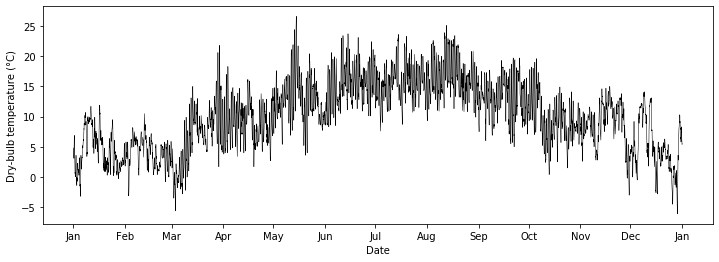

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
fig, ax = plt.subplots(1,figsize=(12,4))
ax.plot(df[var],color='black',linewidth=0.5)
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylabel(var + ' (' + units[var] + ')')
plot_filename=r'hourly_visualisation_outputs/hourly_timeseries_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 6: Create and save a 2D heatmap plot

Other heatmap colors can be chosen here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html and substituted instead of 'gray' in the `cmap` keyword argument of `imshow`.


VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_2D_heatmap_Dry-bulb temperature.png


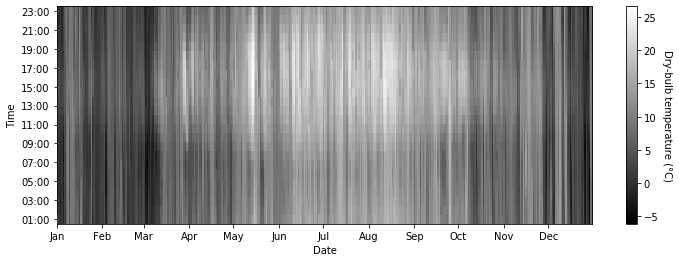

In [6]:
df1=df[[var]].copy()
df1['date']=df1.index.date
df1['time']=df1.index.time
df1=df1.pivot(index='time',columns='date',values=var)
df1=df1.iloc[::-1] # reverses the rows
fig, ax = plt.subplots(1,figsize=(12,4))
xmin,xmax=mdates.date2num([df1.columns[0],df1.columns[-1]])
ymin,ymax=mdates.date2num([pd.Timestamp(str(df1.index[-1])),pd.Timestamp(str(df1.index[0]))])
im=ax.imshow(df1, cmap='gray',interpolation='nearest',aspect='auto',extent=[xmin, xmax, ymin, ymax])
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(var+ ' (' + units[var] + ')', rotation=-90, va="bottom")
ax.xaxis_date()
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis_date()
ax.set_ylabel('Time')
ax.yaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plot_filename=r'hourly_visualisation_outputs/hourly_2D_heatmap_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 7: Create and save a frequency histogram plot

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_frequency_histogram_Dry-bulb temperature.png


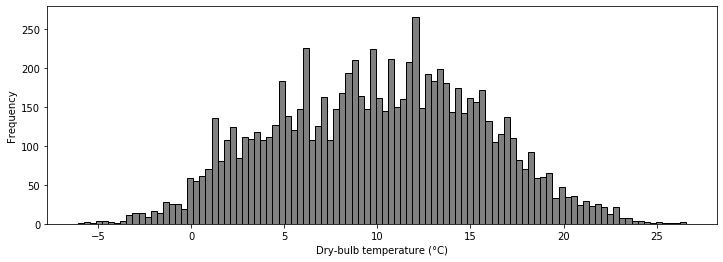

In [7]:
fig, ax = plt.subplots(1,figsize=(12,4))
ax.hist(df[var].dropna(),color='gray',edgecolor='black',bins=100)
ax.set_xlabel(var+ ' (' + units[var] + ')')
ax.set_ylabel('Frequency')
plot_filename=r'hourly_visualisation_outputs/hourly_frequency_histogram_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 8: Create and save a percentage frequency histogram plot

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_percentage_frequency_histogram_Dry-bulb temperature.png


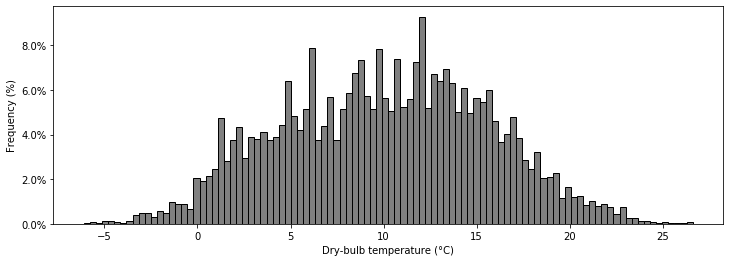

In [8]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(1,figsize=(12,4))
ax.hist(df[var].dropna(),density=True,color='gray',edgecolor='black',bins=100)
ax.set_xlabel(var+ ' (' + units[var] + ')')
ax.set_ylabel('Frequency (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plot_filename=r'hourly_visualisation_outputs/hourly_percentage_frequency_histogram_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 9: Create and save a cumulative histogram plot

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_cumulative_histogram_Dry-bulb temperature.png


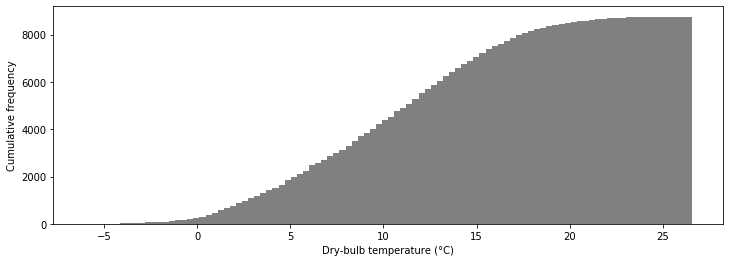

In [9]:
fig, ax = plt.subplots(1,figsize=(12,4))
ax.hist(df[var].dropna(),cumulative=True,color='gray',bins=100)
ax.set_xlabel(var+ ' (' + units[var] + ')')
ax.set_ylabel('Cumulative frequency')
plot_filename=r'hourly_visualisation_outputs/hourly_cumulative_histogram_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

## Step 10: Create and save a percentage cumulative histogram plot

VARIABLE: Dry-bulb temperature
PLOT_FILENAME: hourly_visualisation_outputs/hourly_percentage_cumulative_histogram_Dry-bulb temperature.png


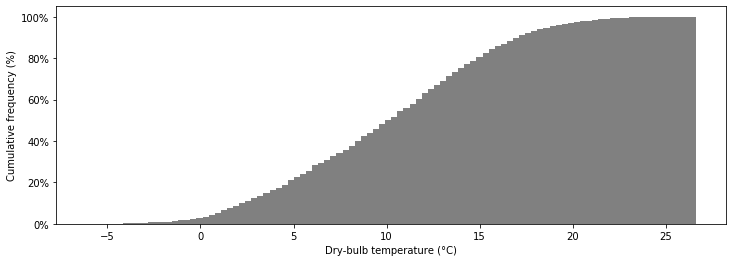

In [10]:
fig, ax = plt.subplots(1,figsize=(12,4))
ax.hist(df[var].dropna(),cumulative=True,density=True,color='gray',bins=100)
ax.set_xlabel(var+ ' (' + units[var] + ')')
ax.set_ylabel('Cumulative frequency (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plot_filename=r'hourly_visualisation_outputs/hourly_percentage_cumulative_histogram_'+var+'.png'
print('VARIABLE: '+var)
print('PLOT_FILENAME: '+plot_filename)
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()